## Dublin Marathon 2019 Analysis
Here I do some analysis on the data that I have already scraped from the web.

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

### Importing and tidying data

In [2]:
#import data from csv file that we have previously scraped from the web
df = pd.read_csv('C:/Users/colli/Dropbox/runthenumbers/01Dublin_Marathon_2019/dublin19.csv', keep_default_na=False)

#Take a look at the data
print(np.shape(df))
df.head(10)

(17732, 10)


,Place overall,Name,From,Cat.,Place in cat.,10kmtime,1st-half time,30kmtime,Chip time,Finish time
0,1,Othmane El Goumri\r\n\t\t\t\t\t \t,,MS,1,00:31:54,01:05:06,01:32:31,02:08:06,02:08:06
1,2,Stephen Scullion\r\n\t\t\t\t\t \t,Clonliffe Harriers A.c.,MS,2,00:31:53,01:06:44,01:35:00,02:12:01,02:12:01
2,3,Mengistu Zelalem\r\n\t\t\t\t\t \t,,MS,3,00:31:53,01:05:07,01:32:31,02:12:04,02:12:05
3,4,Asefa Bekele\r\n\t\t\t\t\t \t,,MS,4,00:31:54,01:05:06,01:33:17,02:13:01,02:13:02
4,5,Tebogo Mathiba\r\n\t\t\t\t\t \t,,MS,5,00:31:54,01:05:05,01:33:55,02:13:10,02:13:11
5,6,Mick Clohisey\r\n\t\t\t\t\t \t,Raheny Shamrock A.c.,MS,6,00:31:54,01:06:17,01:34:42,02:13:18,02:13:19
6,7,Hiribo Shano Share\r\n\t\t\t\t\t \t,,MS,7,00:31:31,01:05:05,01:32:33,02:14:13,02:14:14
7,8,Hugh Armstrong\r\n\t\t\t\t\t \t,Ballina A.c.,MS,8,00:31:55,n/a,01:35:16,02:14:21,02:14:22
8,9,Uladzislau Pramau\r\n\t\t\t\t\t \t,,MS,9,00:32:15,01:07:34,01:36:40,02:15:48,02:15:49
9,10,Sean Hehir\r\n\t\t\t\t\t \t,Metro/st. Brigid's A.c.,MS,10,00:32:05,01:07:23,01:36:26,02:16:01,02:16:01


In [3]:
#Do some tidying up
#Replace n/a's with NaN
df = df.replace('n/a', np.nan)
#df = df.replace("\r\n\t\t\t\t\t \t", "", regex=True)

#Just tell us how many NaN's we have
df.isna().sum()

Place overall      0
Name               0
From               0
Cat.               0
Place in cat.      0
10kmtime         100
1st-half time    128
30kmtime          68
Chip time         82
Finish time        0
dtype: int64

### Creating new columns for time in seconds

In [4]:
#Create a new column for the chip time in seconds
#Note: I am sure there is a more efficient way of doing this, bu this does work
df["Chip secs"] = np.zeros(len(df["Chip time"]))
for i in range(len(df["Chip time"])):

    #Ideally use chip time, but check to see if it exists (ie not NaN)
    if type(df["Chip time"][i]) != float:
        hours = int(df["Chip time"][i][:2])
        mins = int(df["Chip time"][i][3:5])
        secs = int(df["Chip time"][i][-2:])
        df["Chip secs"][i] = hours*3600 + mins*60 + secs
    
    #Chip time is not available for 82 entries, so use finish time instead
    else:
        hours = int(df["Finish time"][i][:2])
        mins = int(df["Finish time"][i][3:5])
        secs = int(df["Finish time"][i][-2:])
        df["Chip secs"][i] = hours*3600 + mins*60 + secs


C:\Users\colli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\colli\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
#Create a new column for the finish time in seconds
df["Finish secs"] = np.zeros(len(df["Finish time"]))
for i in range(len(df["Finish time"])):
    hours = int(df["Finish time"][i][:2])
    mins = int(df["Finish time"][i][3:5])
    secs = int(df["Finish time"][i][-2:])
    df["Finish secs"][i] = hours*3600 + mins*60 + secs


C:\Users\colli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
#Save to csv file and then reload to not have to run all that again
df.to_csv('dublin_with_secs.csv', index=False)


In [7]:
#Reload dataframe
df = pd.read_csv('C:/Users/colli/Dropbox/runthenumbers/01Dublin_Marathon_2019/dublin_with_secs.csv', keep_default_na=False)
df.head()

,Place overall,Name,From,Cat.,Place in cat.,10kmtime,1st-half time,30kmtime,Chip time,Finish time,Chip secs,Finish secs
0,1,Othmane El Goumri\r\r\n\t\t\t\t\t \t,,MS,1,00:31:54,01:05:06,01:32:31,02:08:06,02:08:06,7686.0,7686.0
1,2,Stephen Scullion\r\r\n\t\t\t\t\t \t,Clonliffe Harriers A.c.,MS,2,00:31:53,01:06:44,01:35:00,02:12:01,02:12:01,7921.0,7921.0
2,3,Mengistu Zelalem\r\r\n\t\t\t\t\t \t,,MS,3,00:31:53,01:05:07,01:32:31,02:12:04,02:12:05,7924.0,7925.0
3,4,Asefa Bekele\r\r\n\t\t\t\t\t \t,,MS,4,00:31:54,01:05:06,01:33:17,02:13:01,02:13:02,7981.0,7982.0
4,5,Tebogo Mathiba\r\r\n\t\t\t\t\t \t,,MS,5,00:31:54,01:05:05,01:33:55,02:13:10,02:13:11,7990.0,7991.0


### Basic analysis
Now that we have our data tidied up a little, we will actually do some analysis of it.

In [8]:
#First we create a function to convert seconds to hours and minutes
def sec_to_mins(seconds):
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

Mean Chip time:  4:17:14 
Mean Finish time: 4:18:55


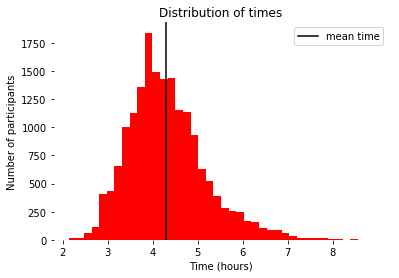

In [9]:
#Get a feeling for the data
mean_chip = df['Chip secs'].mean()
mean_finish = df['Finish secs'].mean()
print("Mean Chip time: ", sec_to_mins(mean_chip), "\nMean Finish time:", sec_to_mins(mean_finish))

#Plotting
plt.hist(df["Finish secs"], bins=40, color="red")
plt.axvline(x=mean_chip, label="mean time", color="black")
#Convert seconds to hours
plt.xticks(list(np.arange(7200, 32400, 3600)), ("2", "3", "4", "5", "6", "7", "8"))
plt.xlabel("Time (hours)")
plt.ylabel("Number of participants")
plt.title("Distribution of times")
plt.box(False)
plt.legend()
plt.savefig("images/Distribution_of_times.jpg")

### Anaylsis of club runners
Now let's find the clubs with the most runners.

Total number of clubs represested: 357
Non-club affiliated runners: 12851


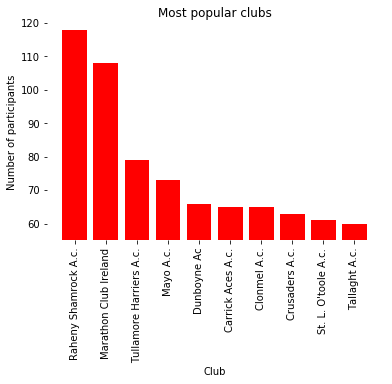

In [10]:
#count up the number of members from each club
pop_clubs = df["From"].value_counts()

#Give the total number of clubs
print("Total number of clubs represested:", np.shape(pop_clubs)[0])

#Number of non club affiliated runners
print("Non-club affiliated runners:", pop_clubs[0])

#Convert to dictionary for plotting purposes
#Choose 10 most popular clubs
E = dict(pop_clubs[1:11])

#Plotting
plt.bar(range(len(E)), list(E.values()), align='center', color="red")
plt.xticks(range(len(E)), list(E.keys()), rotation=90)
plt.ylim([55,120])
plt.xlabel("Club")
plt.ylabel("Number of participants")
plt.title("Most popular clubs")
plt.box(False)
plt.savefig("images/Most_popular_clubs.jpg", bbox_inches='tight')

### Fastest clubs
Next we take a look at the fastest clubs

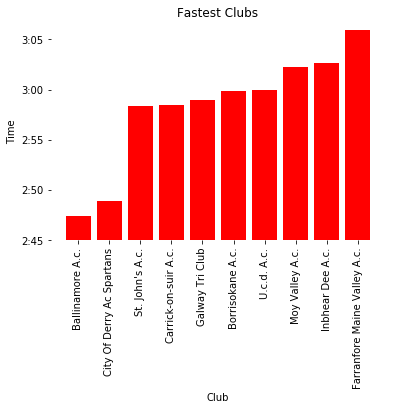

In [11]:
# Find and plot the fastest clubs
gb = df.groupby(["From"])
club_times = gb["Chip secs"].agg(np.mean)

#Sort by time
club_times_sorted = pd.Series({key: value for key, value in sorted(club_times.items(), key=lambda item: item[1])})

D = dict(club_times_sorted[:10])
plt.bar(range(len(D)), list(D.values()), align='center', color="red")
plt.xticks(range(len(D)), list(D.keys()), rotation=90)
plt.ylim([10000,11200])

#Convert times to hours and mins
plt.yticks((9900, 10200, 10500, 10800, 11100),("2:45", "2:50", "2:55", "3:00", "3:05"))
plt.title("Fastest Clubs")
plt.xlabel("Club")
plt.ylabel("Time")
plt.box(False)
plt.savefig("images/Fastest_clubs.jpg", bbox_inches='tight')

Now this is all very well and good, but doesn't take into account that some of these clubs are very small (for example a club with only one runner who runs 2:45 will thus have a club average of 2:45). For this reason it seems fair in trying to find the fastest club to only work with the "large" clubs. So lets do this again, defining a large club as one with 20 or more runners. 

Difference between club runners and non club runners is 747 seconds


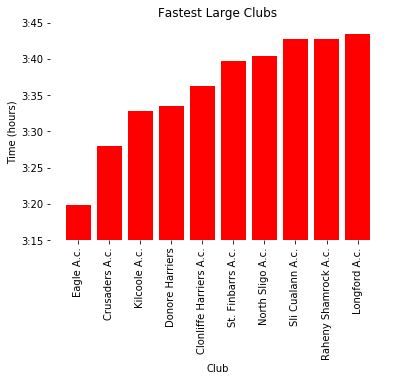

In [12]:
df_club = df[df["From"] != '']

#Find the average finishing time for a club runner
club_mean = df_club["Chip secs"].mean()
print("Difference between club runners and non club runners is %.0f seconds" % (mean_chip-club_mean))

df_club_large = df_club[df_club['From'].isin(df_club['From'].value_counts()[df_club['From'].value_counts() > 20].index)]

# Find and plot the most common clubs
group = df_club_large.groupby(["From"])
large_club_times = group["Chip secs"].agg(np.mean)

#Sort by time
large_club_times_sorted = pd.Series({key: value for key, value in sorted(large_club_times.items(), key=lambda item: item[1])})

F = dict(large_club_times_sorted[:10])
plt.bar(range(len(F)), list(F.values()), align='center', color="red")
plt.xticks(range(len(F)), list(F.keys()), rotation=90)
plt.ylim([11800,13500])

#Convert times to hours and mins
plt.yticks(list(np.arange(11700, 13800, 300)),("3:15", "3:20", "3:25", "3:30", "3:35", "3:40", "3:45"))
plt.title("Fastest Large Clubs")
plt.xlabel("Club")
plt.ylabel("Time (hours)")
 
plt.box(False)
plt.savefig("images/Fastest_large_clubs.jpg", bbox_inches='tight')